## Neuronal modelisation : Leaky integrated and fire (LIF)

In [18]:
# For the leaky integrated and fire model we need several parameters : 

Vrep = -70 # Resting statet potential 
Vrepol = -80 # Post spike hyperpolarisation potential
Vspike = 20 # Potential reached at the spike
Vthr = -50 # Spike threshold 

R = 0.14 # Neuronal membrane resistance
Tau  = 30 # Time constant of the neurone to charge 
I = 150 # Input in Ampere applied to the neuron 

# Recording parameters : 
dur = 1000 # Recording duration
dt = 0.1 # Time step, equivalent to the sampling rate

**Equation LIF :**

$$ \frac{dV}{dt} = \frac{(V_{rep} - V + RI)}{\tau}$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# To be more clear and have a clean function let's put all our parameters in a single array
parameters = np.array([Vrep, Vrepol, Vspike, Vthr, R, Tau])

# Let's also build a time array correspond to all the recording time of the fake neuron
time = np.arange(0, dur, dt) # shape dur/dt

In [20]:
# Let's build the LIF function taking as variables : parameters and time. 
# In code we try most of the time to create fast and elegante function by making them efficient with the less number of lines of code


def LIF(time, parameters):
    """
    Parameters
    -----------
    time    : np.array, of shape dur/dt, containing all the time step 
    parameters  : np.array of shape 5, containing all the parameters of the LIF neuron 
    The parameters should be in this order  : Vrep, Vrepol, Vspike, Vthr, R, Tau
    """
    Vrep, Vrepol, Vspike, Vthr, R, Tau = parameters

    dt = time[1] 
    
    V = np.ones_like(time) # creation of array for all the futur membrane potential with a shape similar to the time array
    V[0] = Vrep

    for i in range (len(time)-1): # We have to commput with a -1 because we V is shape dur/dt thus we a calculate the value i+1, so it may lead to size error. 
        V[i+1] = V[i] + dt * (Vrep - V[i] + R * I) / Tau
        if V[i] >= Vthr:
            V[i] = Vspike
            V[i+1] = Vrepol

    return V

In [21]:
Neuron1 = LIF(time = time, parameters = parameters) # Let's builf out first LIF neuron
# Neuron1 contains all the membrane potential computed with the LIF function. 

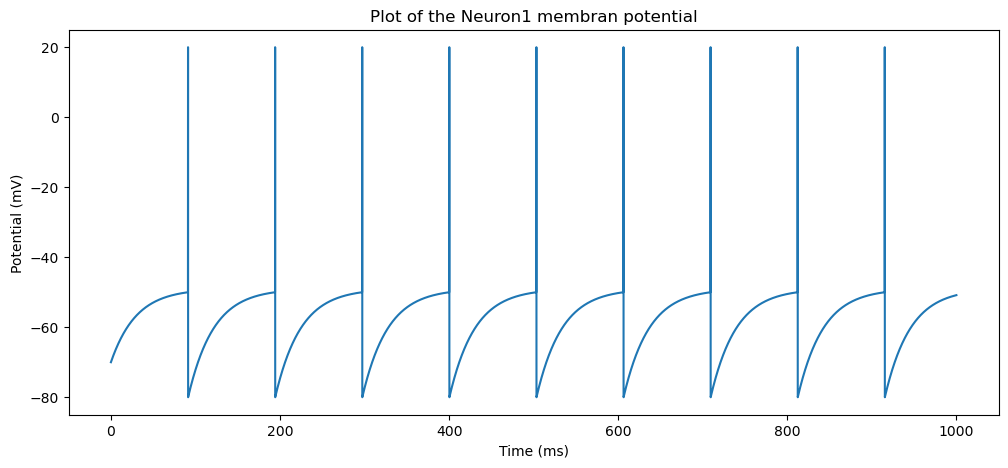

In [24]:
# Let's plot now
plt.figure(figsize = (12, 5))
plt.plot(time, Neuron1, label = "Neuron1")
plt.xlabel("Time (ms)")
plt.ylabel("Potential (mV)")
plt.title("Plot of the Neuron1 membran potential")
plt.show()